## Simple Research Study on Japanese Hostels

As someone who possesses a love for travel and has yet won the lottery, finding ways to save while traveling is essential for me to be able to do what I love to do. Hostels have been an amazing lodging option for anyone who's traveling on a budget or just wants to experience something different outside of traditional hotels. Hostels haven't always gotten the best rap so I conducted a simple research study on hostels in Japan for anyone who's seeking a more afforable place to stay when they're in Japan.

The dataset was pulled from Kaggle:

https://www.kaggle.com/koki25ando/hostel-world-dataset

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from wordcloud import WordCloud

# Read CSV file
hostels_df = pd.read_csv("Hostel.csv", index_col=0)
hostels_df

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
6,1night1980hostel Tokyo,Tokyo,2100,9.4km from city centre,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
7,328 Hostel & Lounge,Tokyo,3300,16.5km from city centre,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044
8,36Hostel,Hiroshima,2000,1.6km from city centre,9.5,Superb,8.8,9.9,9.2,9.6,9.8,9.8,9.5,NaN,NaN
9,3Q House - Asakusa Smile,Tokyo,2500,10.2km from city centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Ace Inn Shinjuku,Tokyo,2200,3km from city centre,7.7,Very Good,6.7,7.2,6.8,8.5,7.8,8.5,8.1,139.724304,35.692512


In [2]:
# Check for missing values and column names
hostels_df.count()

hostel.name      342
City             342
price.from       342
Distance         342
summary.score    327
rating.band      327
atmosphere       327
cleanliness      327
facilities       327
location.y       327
security         327
staff            327
valueformoney    327
lon              298
lat              298
dtype: int64

In [3]:
# Rename column names
hostels_df.columns = ["Hostel Name", "City", "Min. Price for One Night (yen)", 
                      "Distance from City Center", "Summary Score", "Rating", "Atmosphere", 
                      "Cleaniness", "Facilities", "Location", "Security", "Staff", "Value for Money", 
                      "Longitude", "Latitude"]
hostels_df.head()

,Hostel Name,City,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [4]:
# Get hostel count for each city
city_group = hostels_df.groupby("City").count()
city_group

,Hostel Name,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
City,,,,,,,,,,,,,,
Fukuoka-City,19,19,19,17,17,17,17,17,17,17,17,17,14,14
Hiroshima,14,14,14,14,14,14,14,14,14,14,14,14,13,13
Kyoto,78,78,78,73,73,73,73,73,73,73,73,73,66,66
Osaka,104,104,104,101,101,101,101,101,101,101,101,101,89,89
Tokyo,127,127,127,122,122,122,122,122,122,122,122,122,116,116


In [5]:
# Reset index
city_group = city_group.reset_index()
city_group

,City,Hostel Name,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
0,Fukuoka-City,19,19,19,17,17,17,17,17,17,17,17,17,14,14
1,Hiroshima,14,14,14,14,14,14,14,14,14,14,14,14,13,13
2,Kyoto,78,78,78,73,73,73,73,73,73,73,73,73,66,66
3,Osaka,104,104,104,101,101,101,101,101,101,101,101,101,89,89
4,Tokyo,127,127,127,122,122,122,122,122,122,122,122,122,116,116


In [6]:
# Create new dataframe for city name and hostel count
city_group = city_group[["City", "Hostel Name"]]
city_group

,City,Hostel Name
0,Fukuoka-City,19
1,Hiroshima,14
2,Kyoto,78
3,Osaka,104
4,Tokyo,127


In [7]:
# Rename columns
city_group.rename(columns={"Hostel Name": "Hostel Count"}, inplace=True)

/Users/lenatran/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [8]:
city_group

,City,Hostel Count
0,Fukuoka-City,19
1,Hiroshima,14
2,Kyoto,78
3,Osaka,104
4,Tokyo,127


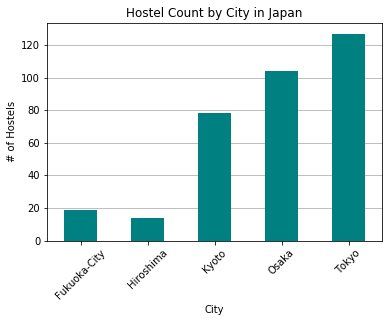

In [9]:
# Create bar chart for hostel count by city
city_bar = city_group.plot.bar(x="City", y="Hostel Count", rot=90, legend=None, color="teal", zorder=3)
plt.grid(which="major", axis="y", zorder=0)
plt.xticks(rotation=45)
plt.title("Hostel Count by City in Japan")
plt.ylabel("# of Hostels")
plt.show()

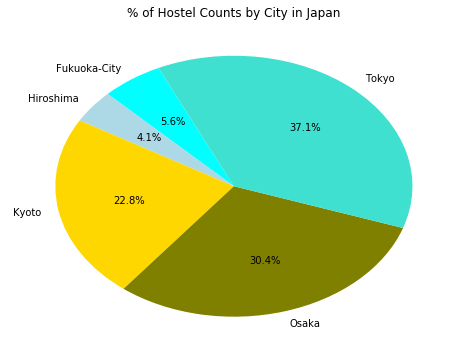

In [10]:
# Create pie chart for hostel count by city
hostel_count = city_group["Hostel Count"]
colors = ["aqua", "lightblue", "gold", "olive", "turquoise"]
city_labels = city_group["City"]
plt.figure(figsize=(8,6))
plt.pie(hostel_count, labels=city_labels, colors=colors, startangle=115, autopct="%1.1f%%")

plt.title("% of Hostel Counts by City in Japan")
plt.show()

More than 1/3 of the hostels are located in Tokyo. 
Around 2/3 of the hostels are located in Tokyo and Osaka.

In [11]:
hostels_df.head()

,Hostel Name,City,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [12]:
# Use split to obtain numeric value from distance column
hostels_df["Distance from City Center (km)"] = hostels_df["Distance from City Center"].str.split("km").str[0]
hostels_df

,Hostel Name,City,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance from City Center (km)
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN,0.7
3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5
6,1night1980hostel Tokyo,Tokyo,2100,9.4km from city centre,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,9.4
7,328 Hostel & Lounge,Tokyo,3300,16.5km from city centre,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,16.5
8,36Hostel,Hiroshima,2000,1.6km from city centre,9.5,Superb,8.8,9.9,9.2,9.6,9.8,9.8,9.5,NaN,NaN,1.6
9,3Q House - Asakusa Smile,Tokyo,2500,10.2km from city centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2
10,Ace Inn Shinjuku,Tokyo,2200,3km from city centre,7.7,Very Good,6.7,7.2,6.8,8.5,7.8,8.5,8.1,139.724304,35.692512,3


In [13]:
# Drop unneeded column
hostels_df = hostels_df.drop(["Distance from City Center"], axis=1)
hostels_df.head()

,Hostel Name,City,Min. Price for One Night (yen),Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance from City Center (km)
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
2,& And Hostel,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN,0.7
3,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
4,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
5,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5


In [14]:
# Change all numeric values to integer/float data types
hostels_df.apply(pd.to_numeric, errors="ignore")

,Hostel Name,City,Min. Price for One Night (yen),Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance from City Center (km)
1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
2,& And Hostel,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN,0.7
3,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
4,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
5,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5
6,1night1980hostel Tokyo,Tokyo,2100,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,9.4
7,328 Hostel & Lounge,Tokyo,3300,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,16.5
8,36Hostel,Hiroshima,2000,9.5,Superb,8.8,9.9,9.2,9.6,9.8,9.8,9.5,NaN,NaN,1.6
9,3Q House - Asakusa Smile,Tokyo,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2
10,Ace Inn Shinjuku,Tokyo,2200,7.7,Very Good,6.7,7.2,6.8,8.5,7.8,8.5,8.1,139.724304,35.692512,3.0


In [15]:
hostels_df.dtypes

Hostel Name                        object
City                               object
Min. Price for One Night (yen)      int64
Summary Score                     float64
Rating                             object
Atmosphere                        float64
Cleaniness                        float64
Facilities                        float64
Location                          float64
Security                          float64
Staff                             float64
Value for Money                   float64
Longitude                         float64
Latitude                          float64
Distance from City Center (km)     object
dtype: object

In [16]:
hostels_df[["Distance from City Center (km)"]] = hostels_df[["Distance from City Center (km)"]].apply(pd.to_numeric)
hostels_df.dtypes

Hostel Name                        object
City                               object
Min. Price for One Night (yen)      int64
Summary Score                     float64
Rating                             object
Atmosphere                        float64
Cleaniness                        float64
Facilities                        float64
Location                          float64
Security                          float64
Staff                             float64
Value for Money                   float64
Longitude                         float64
Latitude                          float64
Distance from City Center (km)    float64
dtype: object

In [17]:
# Check min and max for minimum price column
hostels_df.groupby(["City"]).max()["Min. Price for One Night (yen)"]

City
Fukuoka-City       4300
Hiroshima          3400
Kyoto              4000
Osaka           1003200
Tokyo           1003200
Name: Min. Price for One Night (yen), dtype: int64

In [18]:
hostels_df.groupby(["City"]).min()["Min. Price for One Night (yen)"]

City
Fukuoka-City    2300
Hiroshima       2000
Kyoto           1000
Osaka           1200
Tokyo           1300
Name: Min. Price for One Night (yen), dtype: int64

In [19]:
# Check value count for each unique value for minimum price column
hostels_df.groupby(["Min. Price for One Night (yen)"]).count()["City"]

Min. Price for One Night (yen)
1000        1
1200        5
1300        5
1400        3
1500       21
1600        9
1700        2
1800       13
1900       11
2000       39
2100        8
2200       15
2300       18
2400       10
2500       45
2600       14
2700       14
2800       12
2900       13
3000       23
3100        2
3200        6
3300       10
3400        4
3500        6
3600        4
3700        2
3800        6
3900        2
4000        5
4100        2
4200        1
4300        1
5200        1
5400        1
5500        1
6000        1
6200        1
6300        1
6500        1
7600        1
1003200     2
Name: City, dtype: int64

In [20]:
# Remove outlier
hostels_reduced = hostels_df[hostels_df["Min. Price for One Night (yen)"] < 8000]
hostels_reduced.groupby(["Min. Price for One Night (yen)"]).count()["City"]

Min. Price for One Night (yen)
1000     1
1200     5
1300     5
1400     3
1500    21
1600     9
1700     2
1800    13
1900    11
2000    39
2100     8
2200    15
2300    18
2400    10
2500    45
2600    14
2700    14
2800    12
2900    13
3000    23
3100     2
3200     6
3300    10
3400     4
3500     6
3600     4
3700     2
3800     6
3900     2
4000     5
4100     2
4200     1
4300     1
5200     1
5400     1
5500     1
6000     1
6200     1
6300     1
6500     1
7600     1
Name: City, dtype: int64

There were two outliers that was skewing the hostel price. I removed those two outliers 

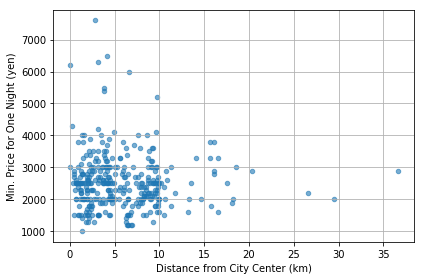

In [21]:
# Create scatter plot
hostels_reduced.plot.scatter("Distance from City Center (km)", "Min. Price for One Night (yen)", alpha=0.6)
plt.tight_layout()
plt.grid()
plt.show()

It is a common assumption that hotel and Airbnb listings are pricier the closer they are to a city center, especially in a popular tourist destination. I wanted to see if this also applies to hostels since they are known to be a more a affordable lodging option for travelers from any part of the world. Despite that knowledge, it was surprising for me to see that there were plenty of hostels with low minimum prices that were close to city centers. It doesn't appear that distance from the city center plays a huge factor to hostel prices.

In [22]:
# Obtain the mean and standard deviation (STD) for minimum price column
price_mean = hostels_reduced.groupby(["City"]).mean()["Min. Price for One Night (yen)"]
price_std = hostels_reduced.groupby(["City"]).std()["Min. Price for One Night (yen)"]
price_mean

City
Fukuoka-City    2736.842105
Hiroshima       2578.571429
Kyoto           2293.589744
Osaka           2391.262136
Tokyo           2769.841270
Name: Min. Price for One Night (yen), dtype: float64

In [23]:
price_std

City
Fukuoka-City     538.733624
Hiroshima        428.195806
Kyoto            718.103517
Osaka            745.457722
Tokyo           1043.246459
Name: Min. Price for One Night (yen), dtype: float64

In [24]:
# Create new dataframe for mean values
mean_df = pd.DataFrame({"City":price_mean.index, "Price Mean (yen)":price_mean.values})
mean_df = mean_df.set_index("City")
mean_df

,Price Mean (yen)
City,
Fukuoka-City,2736.842105
Hiroshima,2578.571429
Kyoto,2293.589744
Osaka,2391.262136
Tokyo,2769.841270


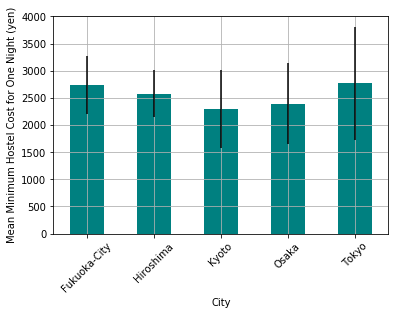

In [25]:
# Create bar chart with y error bar 
mean_df.plot(kind="bar", yerr=price_std.values, color="teal", legend=None)
plt.xticks(rotation=45)
plt.grid()
plt.ylabel("Mean Minimum Hostel Cost for One Night (yen)")
plt.show()

This visualization shows a basic overview of the average cost and the standard deviation of the cost to stay at a hostel in each of the listed Japanese cities.

In [26]:
# Create new dataframe for hostel rating analysis and view # of missing data
sns.set(style="white")
score_df = hostels_reduced.loc[:, "Summary Score":"Value for Money"]
score_df = score_df.drop(["Rating"], axis=1)
print(score_df.isnull().sum())

Summary Score      15
Atmosphere         15
Cleaniness         15
Facilities         15
Location           15
Security           15
Staff              15
Value for Money    15
dtype: int64


In [27]:
# Generate descriptive statistics for dataframe to help determine what to do with missing data
score_df.describe()

,Summary Score,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,8.786462,8.252615,9.012000,8.592000,8.696000,8.950154,9.137231,8.859692
std,0.962508,1.374986,1.216988,1.286755,1.105297,1.116532,1.088009,1.037926
min,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000
25%,8.600000,7.900000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000
50%,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.100000
75%,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [28]:
# Drop missing values
score_df = score_df.dropna().reset_index(drop=True)
print(score_df.isnull().sum())

Summary Score      0
Atmosphere         0
Cleaniness         0
Facilities         0
Location           0
Security           0
Staff              0
Value for Money    0
dtype: int64


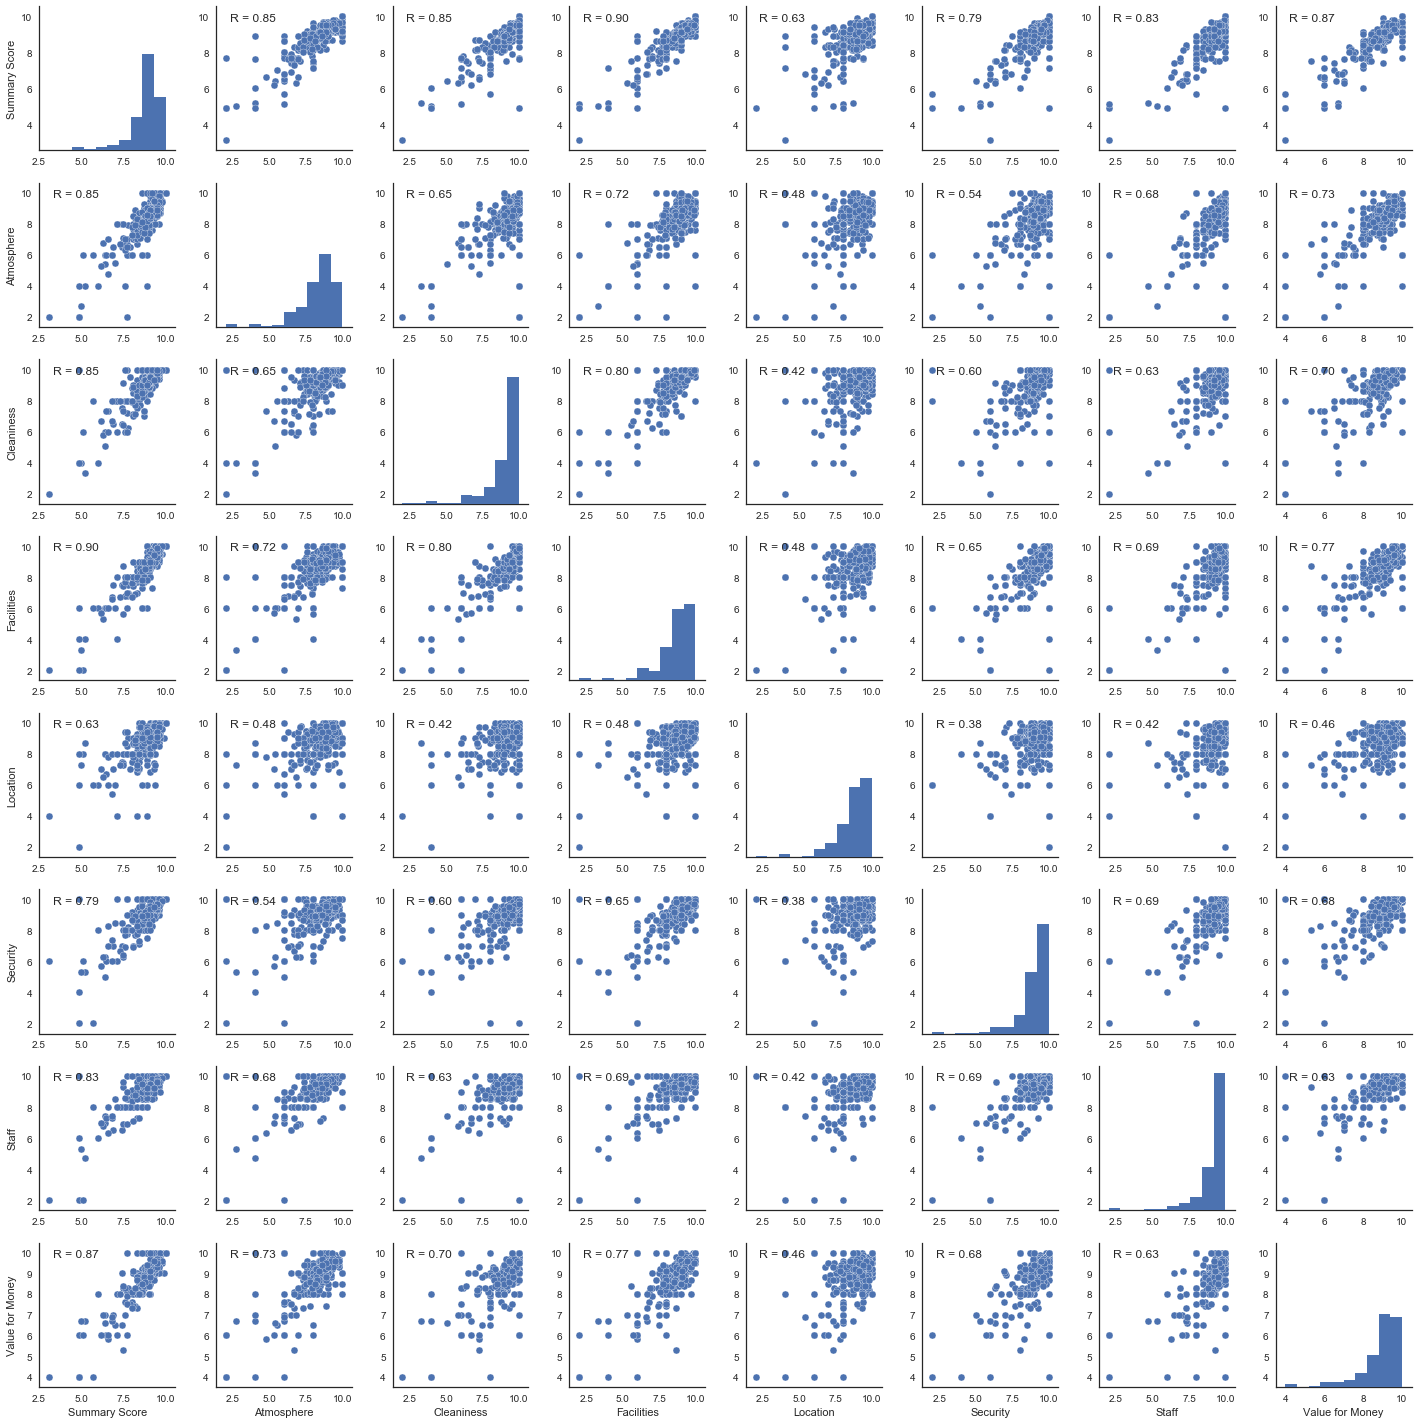

In [35]:
# Use seaborn package to find pairwise relationships in dataset
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("R = {:.2f} ".format(r), 
                xy=(0.1, 0.9), xycoords=ax.transAxes)
    
g = sns.pairplot(score_df)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
plt.show()

To view the relationships between the different rating categories, a Pearsons R score generated from the Seaborn pairplot module was used to make this analysis. Atmosphere, Cleaniness, Facilities, and Value for Money are the categories that have the highest positive correlation with the summary score, positively impacting the summary score the most.

In [36]:
# Create a different dataset for further analysis
city_analysis = hostels_reduced.dropna().reset_index(drop=True)
city_analysis = city_analysis.drop(["Rating"], axis=1)
city_analysis.head()

,Hostel Name,City,Min. Price for One Night (yen),Summary Score,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance from City Center (km)
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,9.2,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
1,&And Hostel Akihabara,Tokyo,3600,8.7,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
2,&And Hostel Ueno,Tokyo,2600,7.4,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
3,&And Hostel-Asakusa North-,Tokyo,1500,9.4,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5
4,1night1980hostel Tokyo,Tokyo,2100,7.0,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,9.4


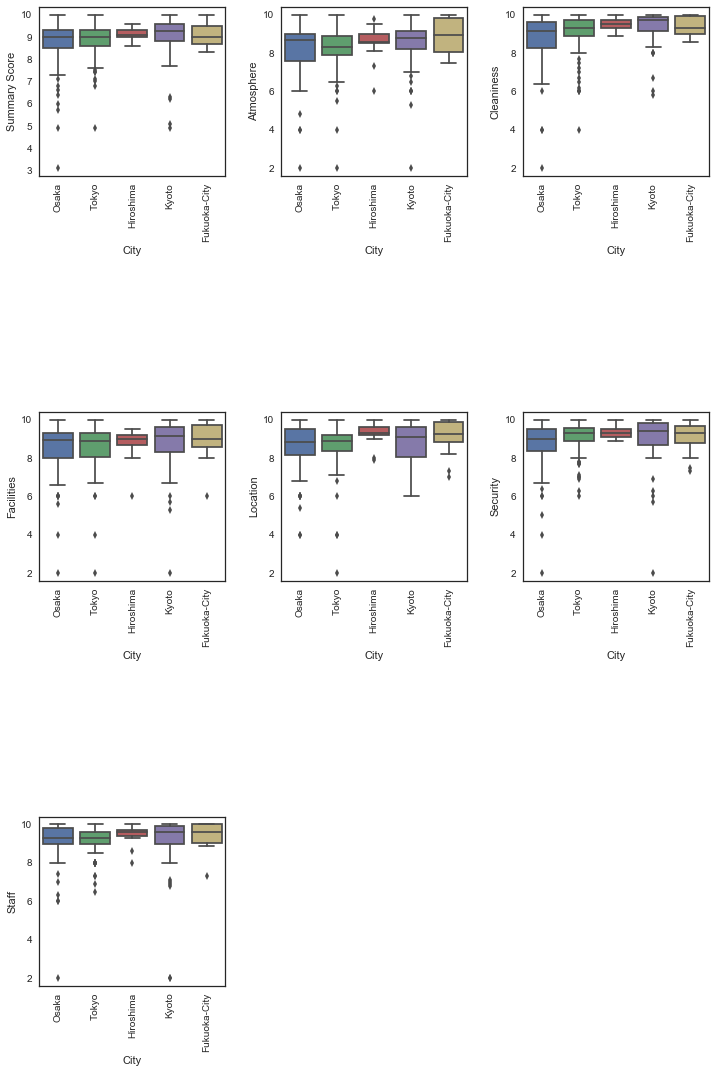

In [37]:
# Create Seaborn boxplots
fig = plt.figure(figsize=(12,18))
fig.subplots_adjust(hspace=1.4, wspace=0.3)
for idx, col in enumerate(city_analysis.columns[3:10]):
    fig.add_subplot(3, 3, idx+1)
    sns.boxplot(x=city_analysis["City"], y=city_analysis[col], data=city_analysis)
    plt.xticks(rotation=90)
plt.show()

The ratings for hostels in Hiroshima are compactly distributed around the average meaning that the these hostels have the most consistent scores. This data shows that hostels in Hiroshima provide the most consistent service and experience for travelers.

In [38]:
# Drop all NaN values
hostels_df = hostels_df.dropna().reset_index(drop=True)
print(hostels_df.isnull().sum())

Hostel Name                       0
City                              0
Min. Price for One Night (yen)    0
Summary Score                     0
Rating                            0
Atmosphere                        0
Cleaniness                        0
Facilities                        0
Location                          0
Security                          0
Staff                             0
Value for Money                   0
Longitude                         0
Latitude                          0
Distance from City Center (km)    0
dtype: int64


In [42]:
# Create list from column values
rating_list = hostels_df["Rating"].tolist()
rating_list

['Superb',
 'Fabulous',
 'Very Good',
 'Superb',
 'Very Good',
 'Superb',
 'Very Good',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Superb',
 'Rating',
 'Very Good',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Superb'

In [43]:
# Convert list to one big string
rating_list = " ".join(rating_list)
rating_list

'Superb Fabulous Very Good Superb Very Good Superb Very Good Superb Fabulous Superb Superb Superb Superb Superb Fabulous Very Good Fabulous Fabulous Superb Fabulous Fabulous Superb Superb Superb Fabulous Fabulous Superb Superb Superb Superb Superb Superb Superb Fabulous Fabulous Superb Superb Fabulous Superb Fabulous Fabulous Superb Fabulous Superb Superb Fabulous Superb Superb Fabulous Fabulous Superb Fabulous Fabulous Superb Superb Rating Very Good Superb Fabulous Superb Superb Superb Fabulous Superb Superb Superb Superb Fabulous Superb Fabulous Superb Fabulous Fabulous Superb Superb Superb Fabulous Fabulous Very Good Superb Fabulous Superb Fabulous Superb Superb Fabulous Fabulous Fabulous Superb Superb Very Good Superb Superb Fabulous Superb Fabulous Superb Superb Superb Superb Fabulous Superb Fabulous Very Good Superb Superb Very Good Superb Superb Superb Superb Superb Fabulous Superb Fabulous Superb Superb Superb Superb Superb Rating Superb Superb Very Good Superb Superb Superb Su

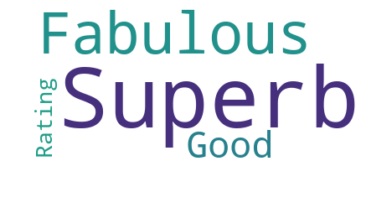

In [44]:
# Create word cloud
wordcloud = WordCloud().generate(rating_list)
wordcloud = WordCloud(background_color="white", max_words=len(rating_list), max_font_size=100, relative_scaling=0.5).generate(rating_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud is a simple data visualization that displays the high ratings and approval of hostels in Japan.